In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/terrorism/globalterrorismdb_0718dist.csv


**Hello There!
I have been provided with the dataset 'Global Terrorism' and I have a role as a security/defence analyst. I need to find out the hot zone of terrorism throughtout the world and the security issues and insights using the exploratory data analysis.**

Firstly,let us convert our .csv file into a dataframe named "**global_terror**" and have a glimpse of it.

In [2]:
#importing the .cv file into th edataframe named global_terror
global_terror = pd.read_csv('../input/terrorism/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1',low_memory = False)
global_terror.info


<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

We can observe here that we have 135 columns, but not all are relevant. Also, we have many relevant columns with incomplete information. We need to select and filter the dataset according to our analysis.

We would be creating a new dataframe named "terrordata" with all relevant columns

In [3]:
#storing only the relevant coulmns from the initial datadrame
terrordata_raw = global_terror[["iyear","imonth","iday","country","country_txt","region","provstate","city","latitude","longitude","attacktype1_txt","targtype1","targtype1_txt","targsubtype1_txt","targsubtype1","target1","natlty1_txt","gname","weaptype1_txt","dbsource"]]
terrordata = terrordata_raw[(terrordata_raw['latitude'].isna() == False) &(terrordata_raw['longitude'].isna() == False)]


Let's examine the condition of terror attacks from in the decade 1970-1980 and in 2007-2017 

In [4]:
#Getting the data for the respectove period of years
terrordatahead = terrordata[terrordata['iyear']<1981]
terrordatatail = terrordata[(terrordata['iyear']>2006) & (terrordata['iyear']<2018)]
terrordatatail


,iyear,imonth,iday,country,country_txt,region,provstate,city,latitude,longitude,attacktype1_txt,targtype1,targtype1_txt,targsubtype1_txt,targsubtype1,target1,natlty1_txt,gname,weaptype1_txt,dbsource
82108,2007,1,1,155,West Bank and Gaza Strip,10,Gaza Strip,Unknown,31.356581,34.326558,Hostage Taking (Kidnapping),10,Journalists & Media,Newspaper Journalist/Staff/Facility,53.0,Jamie Ruzuri,Peru,Unknown,Firearms,CETIS
82109,2007,1,1,205,Thailand,5,Bangkok ( District ),Bangkok,13.727896,100.524124,Bombing/Explosion,14,Private Citizens & Property,Unnamed Civilian/Unspecified,67.0,Bangkok,Thailand,Unknown,Explosives,CETIS
82110,2007,1,1,186,Sri Lanka,6,Northern,Jaffna,9.666399,80.020477,Bombing/Explosion,4,Military,Military Transportation/Vehicle (excluding con...,35.0,Military Vehicle,Sri Lanka,Liberation Tigers of Tamil Eelam (LTTE),Explosives,CETIS
82111,2007,1,1,4,Afghanistan,6,Nangarhar,Behsud,34.467964,70.491493,Facility/Infrastructure Attack,8,Educational Institution,School/University/Educational Building,49.0,Behsud (District) UNICEF built school,Afghanistan,Taliban,Incendiary,CETIS
82112,2007,1,1,153,Pakistan,6,Balochistan,Dera Bugti,29.034412,69.158661,Bombing/Explosion,21,Utilities,Gas,106.0,Main gas pipeline and tow power pylons in Balo...,Pakistan,Baloch Liberation Army (BLA),Explosives,CETIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Somalia,11,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,4,Military,Military Checkpoint,36.0,Checkpoint,Somalia,Al-Shabaab,Firearms,START Primary Collection
181687,2017,12,31,200,Syria,10,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,4,Military,Military Barracks/Base/Headquarters/Checkpost,27.0,Hmeymim Air Base,Russia,Muslim extremists,Explosives,START Primary Collection
181688,2017,12,31,160,Philippines,5,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,14,Private Citizens & Property,House/Apartment/Residence,76.0,Houses,Philippines,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,START Primary Collection
181689,2017,12,31,92,India,6,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,2,Government (General),Government Building/Facility/Office,21.0,Office,India,Unknown,Explosives,START Primary Collection


As we know that , the maps makes things easy to visualize and interpret, let's see through the world map that which countries in the world had been more prone to the terror attacks from 1970 to 2017.

In [5]:
#importing relevant libraries for the data visualization
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


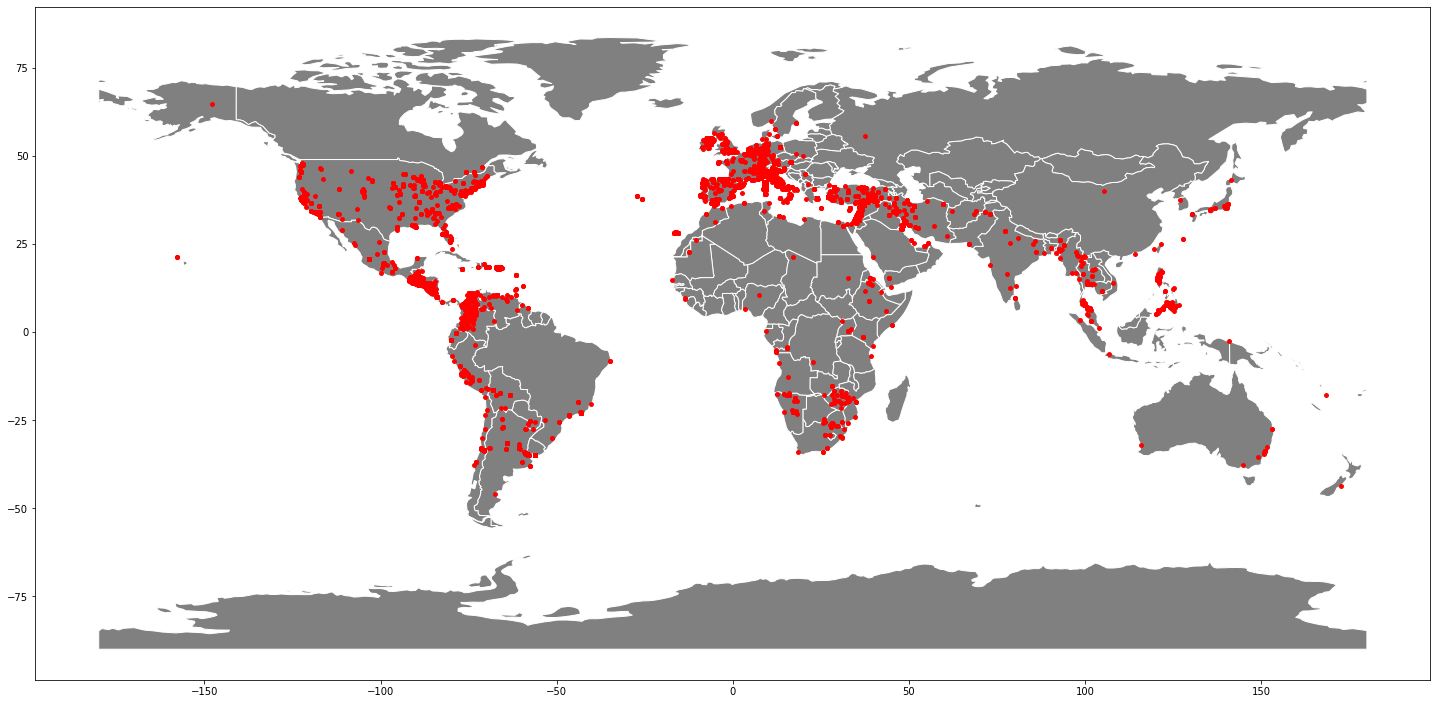

In [6]:
#Using the GeoDataFrame to get the points using the values of Latitudes and Longitudes
geometry1 = [Point(xy) for xy in zip(terrordatahead['longitude'],terrordatahead['latitude'])]
gdf1 = GeoDataFrame(terrordatahead,geometry= geometry1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf1.plot(ax=world.plot(figsize=(25, 25),color = 'grey',edgecolor = 'white'), color='red', markersize=15);

The map above shows the terror activites over the years corresponding to 1970-1980

<AxesSubplot:>

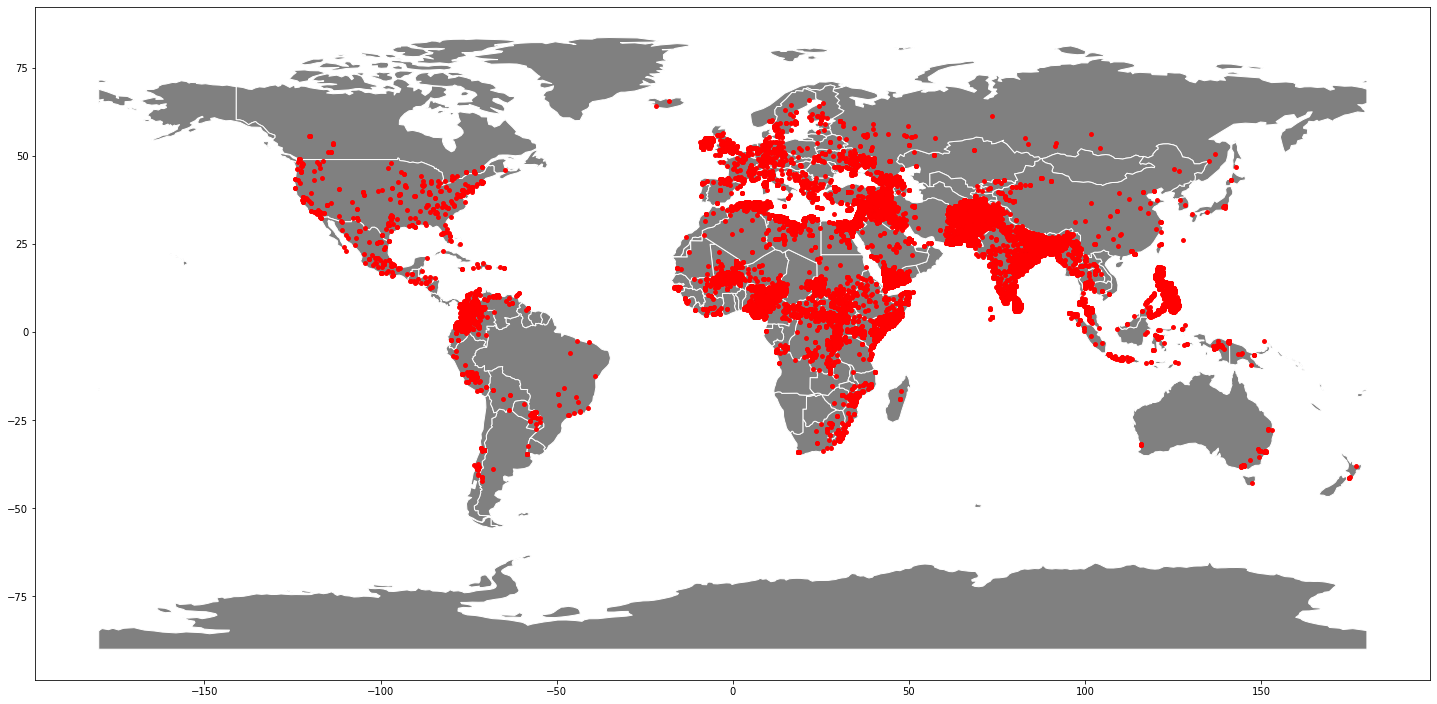

In [7]:
geometry2 = [Point(xy) for xy in zip(terrordatatail['longitude'],terrordatatail['latitude'])]
gdf2 = GeoDataFrame(terrordatatail,geometry= geometry2)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf2.plot(ax=world.plot(figsize=(25, 25),color = 'grey',edgecolor = 'white'), color='red', markersize=15)

**We can observe that the reporting of terror attacks have significantly increased from the period 1970-1980s to 2007-2017.Also, the Africa and South Asia have witnessed increasing terror incidents.** 

Let's see in the decade 2007-2017 that which country has observed most number of terror attacks.

We can observe that the top 5 positions are all grabbed  by Asian Countries. Let's check what was the scenario in 1970-80s.

In [8]:
countryterror_recent = terrordatatail['country_txt'].value_counts()
countryterror_recent.head()

Iraq           22506
Pakistan       12038
Afghanistan    11835
India           7697
Philippines     4460
Name: country_txt, dtype: int64

In [9]:
countryterror_past = terrordatahead['country_txt'].value_counts()
countryterror_past

United Kingdom    1777
United States     1541
Italy             1122
El Salvador       1100
Spain             1067
                  ... 
New Zealand          1
Singapore            1
Botswana             1
Chad                 1
Bahamas              1
Name: country_txt, Length: 113, dtype: int64

Well, we can observe that the overall picture was different in 1970-80s. The terror incidents in records showed up primarily in Europe and North America.

# **Let's check which organisations and groups were mainly attacked in these incidents in 1970-80s.**

In [10]:
terror_targets = terrordatahead['targtype1_txt']
terror_targets.value_counts()



Business                          2959
Private Citizens & Property       1907
Government (General)              1591
Military                          1276
Police                            1246
Government (Diplomatic)            784
Journalists & Media                386
Educational Institution            368
Airports & Aircraft                348
Transportation                     336
Utilities                          201
Terrorists/Non-State Militia       164
Religious Figures/Institutions     155
Unknown                            137
Telecommunication                   82
Violent Political Party             74
Tourists                            48
NGO                                 43
Maritime                            25
Food or Water Supply                15
Abortion Related                    14
Other                                8
Name: targtype1_txt, dtype: int64

**This is very intriguing to see that the bussinesses were attacked the most followed by citizens , government and military.**

Let's see which type of businesses were attacked most.

<BarContainer object of 14 artists>

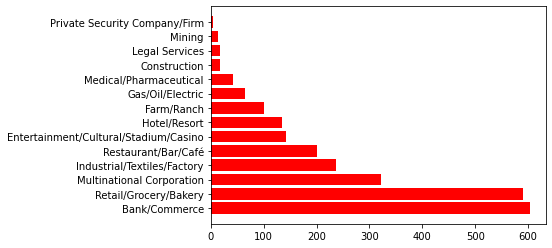

In [11]:
business_targets = terrordatahead[terrordatahead["targtype1_txt"]=="Business"]
business_targets_subtype = business_targets["targsubtype1_txt"]
x= business_targets_subtype.value_counts().tolist()
y =business_targets_subtype.value_counts().keys().tolist()
plt.barh(y,x,color  = 'red' )

Banks and Retail were attacked the most! Let's see how the Banks and Retail Shops were attacked.

In [12]:
bank_attacktype = business_targets[business_targets['targsubtype1_txt']=="Bank/Commerce"]["attacktype1_txt"]
bank_attacktype.value_counts()

Bombing/Explosion                      362
Armed Assault                          114
Facility/Infrastructure Attack          59
Hostage Taking (Kidnapping)             19
Unknown                                 18
Assassination                           16
Hostage Taking (Barricade Incident)     14
Unarmed Assault                          1
Name: attacktype1_txt, dtype: int64

In [13]:
bank_attacktype = business_targets[business_targets['targsubtype1_txt']=="Retail/Grocery/Bakery"]["attacktype1_txt"]
bank_attacktype.value_counts()

Bombing/Explosion                      355
Facility/Infrastructure Attack         138
Armed Assault                           38
Hostage Taking (Kidnapping)             23
Assassination                           14
Unknown                                 13
Hostage Taking (Barricade Incident)      9
Name: attacktype1_txt, dtype: int64

We only considered the Banks and Retail shops as of now. Let's see the number of types of attacks when the target was business.

In [14]:
business_targets["attacktype1_txt"].value_counts()

Bombing/Explosion                      1552
Facility/Infrastructure Attack          444
Armed Assault                           359
Hostage Taking (Kidnapping)             245
Assassination                           230
Unknown                                  82
Hostage Taking (Barricade Incident)      46
Unarmed Assault                           1
Name: attacktype1_txt, dtype: int64

We can see that the majority of attacks done when the target was Business is **Bombing/Explosion**

([<matplotlib.patches.Wedge at 0x7f7a006c62d0>,
 [Text(0.25070290424014646, 1.0710499772678939, 'Bombing/Explosion'),
  Text(-1.0783867036891237, -0.2169841406796969, 'Assassination'),
  Text(-0.23962765917746895, -1.0735821277187538, 'Armed Assault'),
  Text(0.6170625862501776, -0.9106227345340343, 'Facility/Infrastructure Attack'),
  Text(0.9670295593591764, -0.524265039198302, 'Hostage Taking (Kidnapping)'),
  Text(1.0653255510559432, -0.2740099820578643, 'Unknown'),
  Text(1.093599320640455, -0.11849272507093184, 'Hostage Taking (Barricade Incident)'),
  Text(1.0994179003639073, -0.03578100556745099, 'Hijacking'),
  Text(1.0999752123048143, -0.007384599852326842, 'Unarmed Assault')],
 [Text(0.19372497145829495, 0.827629527888827, '42.7%'),
  Text(-0.83329881648705, -0.16766956325249305, '21.0%'),
  Text(-0.185166827546226, -0.8295861896008553, '15.7%'),
  Text(0.47682108937513723, -0.7036630221399355, '10.2%'),
  Text(0.7472501140502726, -0.4051138939259606, '5.0%'),
  Text(0.82320

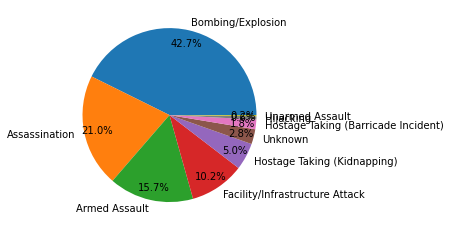

In [15]:
label = terrordatahead['attacktype1_txt'].value_counts().keys().tolist()
values = terrordatahead['attacktype1_txt'].value_counts().tolist()
plt.pie(values,labels=label ,autopct='%1.1f%%', pctdistance=0.85)

**Almost 64% of attacks across the globe was by Bombing/Explosion and Assasination and the Businesses were most affected by the terror attacks.**

# We've got the scenario of the 1970-80s.Let's see how much the motive of terrorists have changed in 2007-2017.

In [16]:
terror_targets = terrordatatail['targtype1_txt']
terror_targets.value_counts()

Private Citizens & Property       27053
Military                          16918
Police                            14905
Government (General)              10414
Business                           7679
Unknown                            4912
Educational Institution            2653
Religious Figures/Institutions     2631
Transportation                     2568
Terrorists/Non-State Militia       2178
Utilities                          2024
Journalists & Media                1153
Violent Political Party            1076
Government (Diplomatic)            1008
NGO                                 537
Telecommunication                   509
Airports & Aircraft                 273
Food or Water Supply                127
Other                               113
Maritime                            104
Tourists                             99
Abortion Related                     18
Name: targtype1_txt, dtype: int64

**Citizens , Government , Military and Police still hold the top positions as the victim of terror attacks.**

Let's see which types of attacks were done during these years.

([<matplotlib.patches.Wedge at 0x7f7a0064e5d0>,
 [Text(-0.09904840053181331, 1.0955315670267516, 'Bombing/Explosion'),
  Text(-0.6738136543443921, -0.8694683198478576, 'Armed Assault'),
  Text(0.32186036440748617, -1.051858310716553, 'Hostage Taking (Kidnapping)'),
  Text(0.720792915637809, -0.8309377670838812, 'Assassination'),
  Text(0.9635554675620543, -0.530623087446514, 'Facility/Infrastructure Attack'),
  Text(1.076667277673582, -0.22536098417196795, 'Unknown'),
  Text(1.098381202625282, -0.05965512316171828, 'Unarmed Assault'),
  Text(1.099565815401552, -0.03090335904590817, 'Hostage Taking (Barricade Incident)'),
  Text(1.099958681349552, -0.009534113684807883, 'Hijacking')],
 [Text(-0.05852860031425332, 0.6473595623339895, '52.9%'),
  Text(-0.3981626139307772, -0.5137767344555522, '23.3%'),
  Text(0.19019021533169636, -0.6215526381506903, '7.2%'),
  Text(0.4259230865132507, -0.4910086805495662, '6.1%'),
  Text(0.5693736853775776, -0.31355000621839463, '5.1%'),
  Text(0.6362124

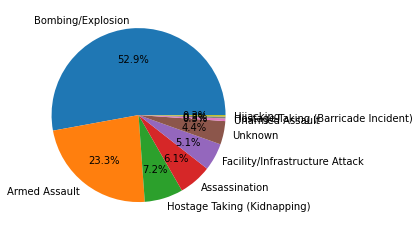

In [17]:
label = terrordatatail['attacktype1_txt'].value_counts().keys().tolist()
values = terrordatatail['attacktype1_txt'].value_counts().tolist()
plt.pie(values,labels=label ,autopct='%1.1f%%', pctdistance=0.65)

**Assasination has decreased significantly form 21% to 6.1% , but the Armed assaults and Bombing/Explosions have almost 3/4th share of total attacks during these years!**

# Let's compare the  situation of the Bombing/Explosion and Armed Assaults in the period 1970-80s to the period 2007-2017.

<AxesSubplot:>

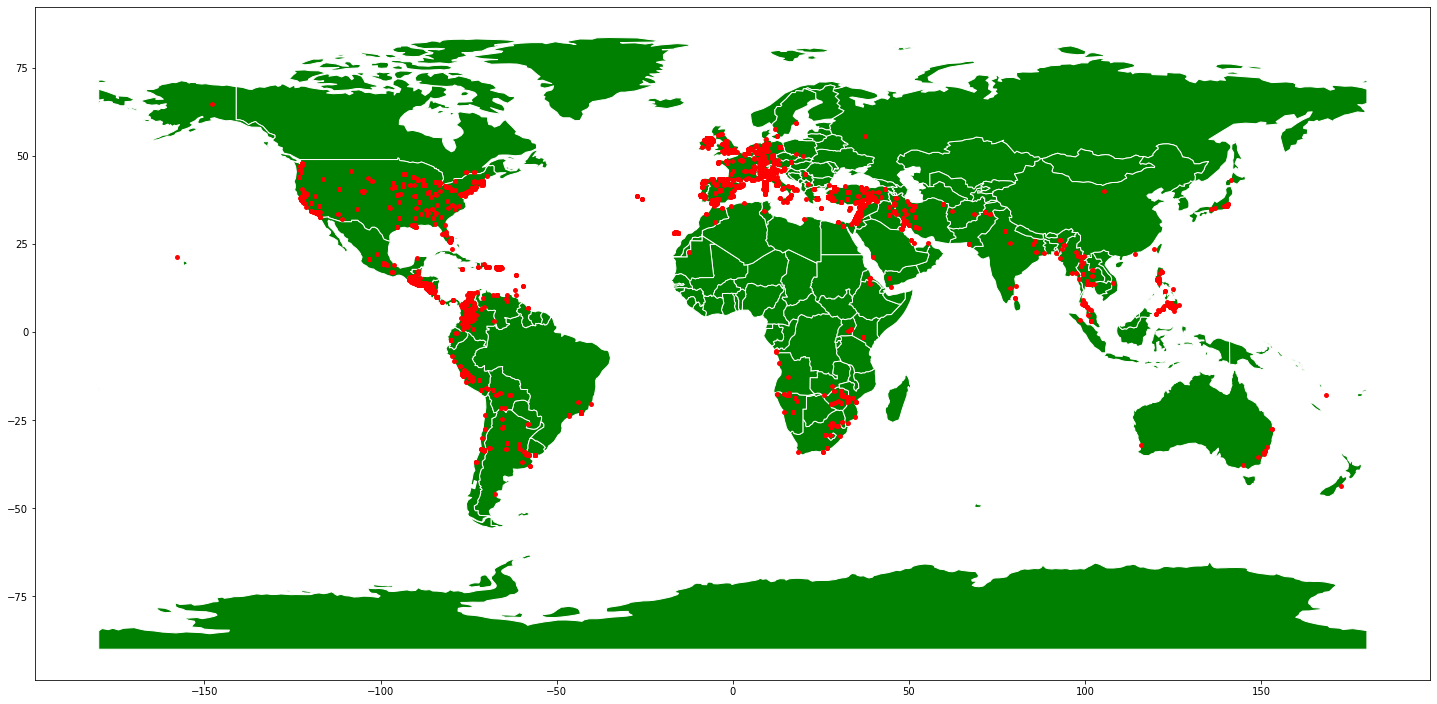

In [18]:
bombandarmed = terrordatahead[terrordatahead['attacktype1_txt'].isin(['Bombing/Explosion','Armed Assault'])]

geometry3 = [Point(xy) for xy in zip(bombandarmed['longitude'],bombandarmed['latitude'])]
gdf3 = GeoDataFrame(bombandarmed,geometry= geometry3)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf3.plot(ax=world.plot(figsize=(25, 25),color = 'green',edgecolor = 'white'), color='red', markersize=15)

The above plot represents the conditions in 1970-80s. Let's see the condition in 2007-2017.

<AxesSubplot:>

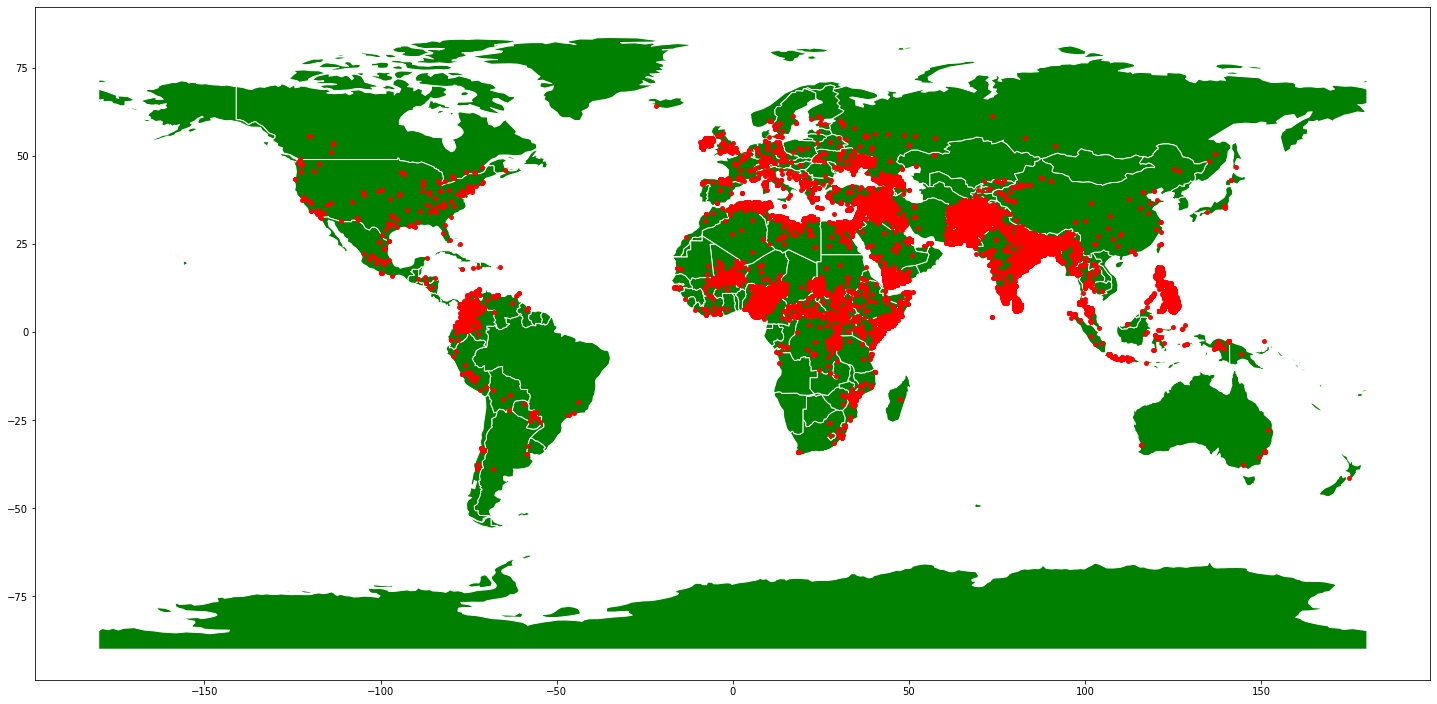

In [19]:
bombandarmednew = terrordatatail[terrordatatail.attacktype1_txt.isin(['Bombing/Explosion','Armed Assault'])]
geometry4 = [Point(xy) for xy in zip(bombandarmednew['longitude'],bombandarmednew['latitude'])]
gdf4 = GeoDataFrame(bombandarmednew,geometry= geometry4)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf4.plot(ax=world.plot(figsize=(25, 25),color = 'green',edgecolor = 'white'), color='red', markersize=15)

So, the South Asia and Africa have witnessed most of the bombing/explosions and armed assaults in 2007-2017.

# **Which countries have emerged as the hot zone of terrorism?**
# Iraq , Pakistan , Afghanistan and India have witnessed many terror attacks in the recent years 

# **What are the most preferred ways of terrorists to attack and threaten people?**

# Bombing/Explosion and Armed Assaults have been the major ways of terror attacks in recent times.

# We can also observe through the maps that the attacks are not only concentrated in the border areas but are spread throughout regions of respective countries. It means that the Bombing/Explosions and the Armed Assaults also occur in the inner regions of the countries pointing towards the failure of the administration of the country in **regulation of illegal Arms and weaponry** as well as the **regulations of materials necessary to make bombs**. Almost 75% of the  attacks have been because of these two factors.

# Thus, the regulatory laws are needed to be made more strict and obligatory.